In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Problem 1

In [30]:
N=20 #standardize the basis across prbm 1

a = tensor(qeye(2), destroy(N)) 
a_dag = tensor(qeye(2), create(N))
sx = tensor(sigmax(), qeye(N)) 
sz = tensor(sigmaz(), qeye(N)) 

def hamiltonian(w, w0, g): # method to define our hamiltonian
    H = ((w0/2)*sz) + (w*(a_dag*a + .5)) + (((g/2)*sx)*(a + a_dag))
    return H

def time_ev_op(H,t): #general time evolution operator 
    return (-1j*H*t).expm()

def rwa_time_op(w, w0, n, g, t):
    r = (g/2)*np.sqrt(n+1)
    delta = w-w0
    rp = np.sqrt(r**2 + delta**2) #calculate params
    
    U_mat = np.array([
        [
            (np.cos((rp*t)/2)) - 1j*(delta/rp)*np.sin((rp*t)/2),
            -1j*(r/rp)*np.sin((rp*t)/2)
        ],
        [
            -1j*(r/rp)*np.sin((rp*t)/2),
            (np.cos((rp*t)/2)) + 1j*(delta/rp)*np.sin((rp*t)/2)
        ]
    ])
    U = tensor(qutip.Qobj(U_mat), qeye(N))
    return U


### 1a)

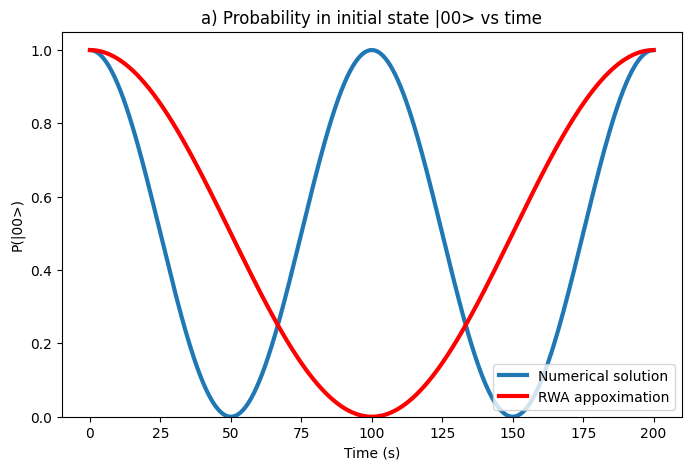

In [5]:
w = 2*np.pi
w0 = 2*np.pi
g = w/100

psi0 = tensor(basis(2,0), basis(N,0)) #define |00>

times = np.linspace(0,200,600) #We'll plot over 2 oscillations

H = hamiltonian(w,w0,g)
prob00 = []
prob00_rwa = []

for t in times:
    state = time_ev_op(H,t)*psi0
    prob00.append(np.abs(state[0,0])**2) #calculates time-ev numerically
    state2 = rwa_time_op(w,w0,0,g,t)*psi0
    prob00_rwa.append(np.abs(state2[0,0])**2)

fig = plt.figure(figsize=(8,5))
plt.plot(times, prob00, linewidth=3, label = "Numerical solution")
plt.plot(times, prob00_rwa, linewidth=3, color ="red", label = "RWA appoximation" )
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|00>)")
plt.title("a) Probability in initial state |00> vs time")
plt.legend(loc="lower right")
plt.show()

### 1b)

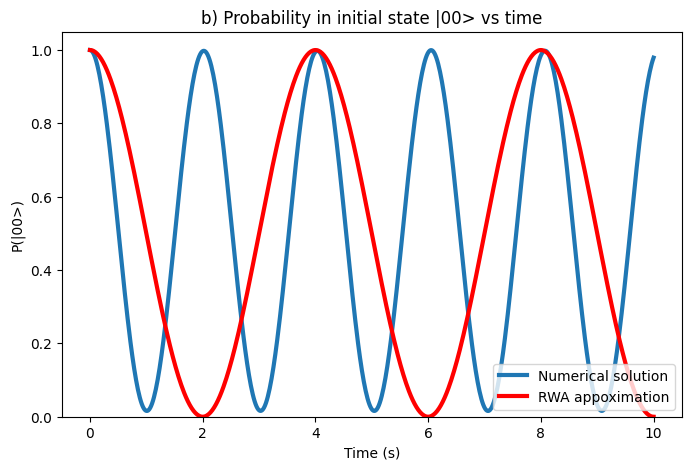

In [6]:
w = 2*np.pi
w0 = 2*np.pi
g = w/2

psi0 = tensor(basis(2,0), basis(N,0)) #define |00>

times = np.linspace(0,10,600)

H = hamiltonian(w,w0,g)
prob00 = []
prob00_rwa = []

for t in times:
    state = time_ev_op(H,t)*psi0
    prob00.append(np.abs(state[0,0])**2) #calculates time-ev numerically
    state2 = rwa_time_op(w,w0,0,g,t)*psi0
    prob00_rwa.append(np.abs(state2[0,0])**2)

fig = plt.figure(figsize=(8,5))
plt.plot(times, prob00, linewidth=3, label = "Numerical solution")
plt.plot(times, prob00_rwa, linewidth=3, color ="red", label = "RWA appoximation" )
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|00>)")
plt.title("b) Probability in initial state |00> vs time")
plt.legend(loc="lower right")
plt.show()

### 1c)

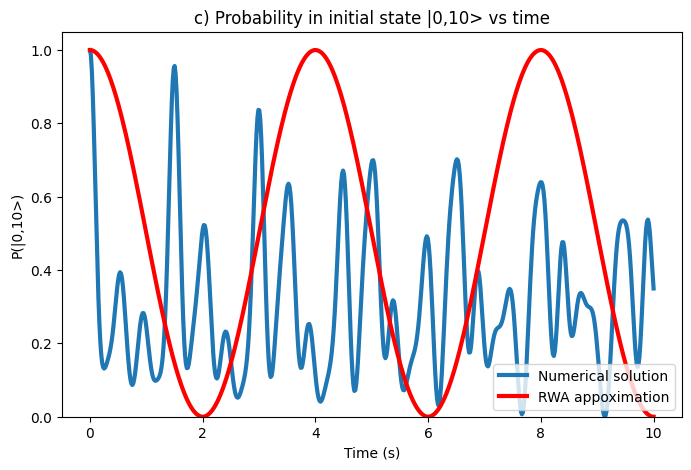

In [7]:
w = 2*np.pi
w0 = 2*np.pi
g = w/2

psi0 = tensor(basis(2,0), basis(N,10)) #define |00>

times = np.linspace(0,10,600)

H = hamiltonian(w,w0,g)
prob00 = []
prob00_rwa = []

for t in times:
    state = time_ev_op(H,t)*psi0
    prob00.append(np.abs(state[10,0])**2) #calculates time-ev numerically
    state2 = rwa_time_op(w,w0,0,g,t)*psi0
    prob00_rwa.append(np.abs(state2[10,0])**2)

fig = plt.figure(figsize=(8,5))
plt.plot(times, prob00, linewidth=3, label = "Numerical solution")
plt.plot(times, prob00_rwa, linewidth=3, color ="red", label = "RWA appoximation" )
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|0,10>)")
plt.title("c) Probability in initial state |0,10> vs time")
plt.legend(loc="lower right")
plt.show()

### 1d)

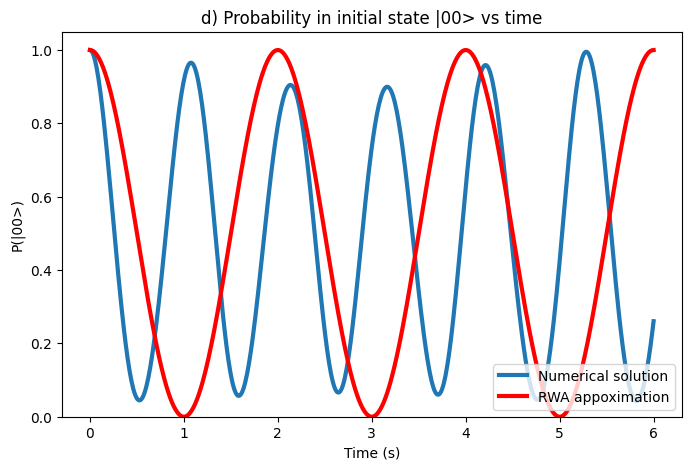

In [8]:
w = 2*np.pi
w0 = 2*np.pi
g = w

psi0 = tensor(basis(2,0), basis(N,0)) #define |00>

times = np.linspace(0,6,600)

H = hamiltonian(w,w0,g)
prob00 = []
prob00_rwa = []

for t in times:
    state = time_ev_op(H,t)*psi0
    prob00.append(np.abs(state[0,0])**2) #calculates time-ev numerically
    state2 = rwa_time_op(w,w0,0,g,t)*psi0
    prob00_rwa.append(np.abs(state2[0,0])**2)

fig = plt.figure(figsize=(8,5))
plt.plot(times, prob00, linewidth=3, label = "Numerical solution")
plt.plot(times, prob00_rwa, linewidth=3, color ="red", label = "RWA appoximation" )
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|00>)")
plt.title("d) Probability in initial state |00> vs time")
plt.legend(loc="lower right")
plt.show()

# Problem 2

In [32]:
w0 = 2*np.pi
g = w0/100
w = 4*np.pi
N = 16 #the basis size we'll use here

a = tensor(qeye(2), qeye(2), destroy(N)) # qubit1 tensor qubit 2 tensor ho
a_dag = tensor(qeye(2), qeye(2), create(N))



sz1 = tensor(sigmaz(), qeye(2), qeye(N)) #z on first qubit, I on second qubit, I on HO
sz2 = tensor(qeye(2), sigmaz(), qeye(N)) # I on first, Z on second, I on HO

sp1 = tensor(sigmap(), qeye(2), qeye(N)) #same logic as above
sp2 = tensor(qeye(2), sigmap(), qeye(N))

sm1 = tensor(sigmam(), qeye(2), qeye(N)) #same logic as above
sm2 = tensor(qeye(2), sigmam(), qeye(N))

Ham = ((w0/2)*sz1) + ((w0/2)*sz2) + (w*(a_dag*a + .5)) + (g/2)*((sp1*a) + (sp2*a) + (sm1*a_dag) + (sm2*a_dag)) #define our Hamiltonian

def time_ev_op2(t): #U(t)
    return (-1j*Ham*t).expm()

### i)

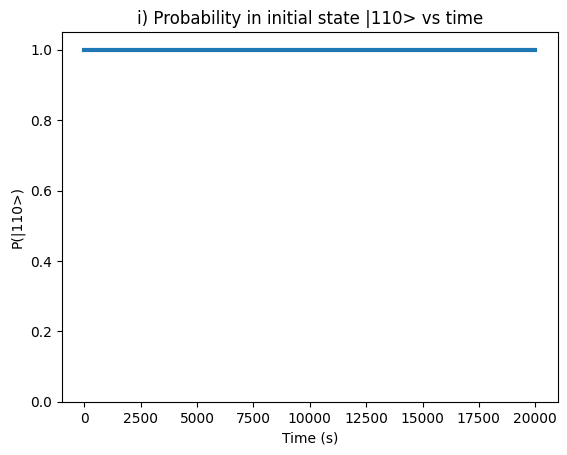

In [22]:
psi0 = tensor(basis(2,1), basis(2,1), basis(N,0)) #|110>
times = np.linspace(0,20000,500)

prob110 = []
for t in times:
    state = time_ev_op2(t)*psi0
    prob110.append(np.abs(state[3*N,0])**2)

plt.plot(times, prob110, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|110>)")
plt.title("i) Probability in initial state |110> vs time")
plt.show()



### ii)

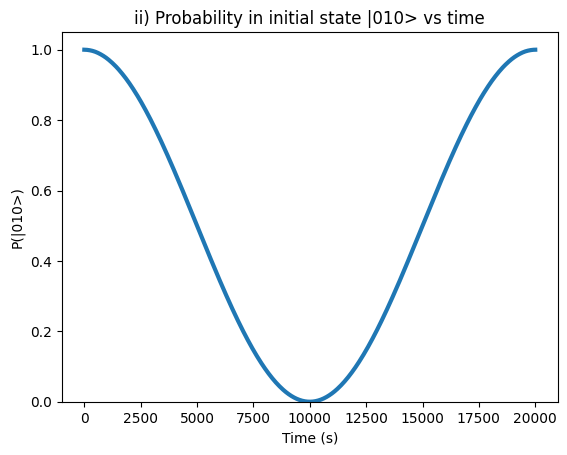

In [23]:
psi0 = tensor(basis(2,0), basis(2,1), basis(N,0))

times = np.linspace(0,20000,500)

prob010 = []
for t in times:
    state = time_ev_op2(t)*psi0
    prob010.append(np.abs(state[N,0])**2)



plt.plot(times, prob010, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|010>)")
plt.title("ii) Probability in initial state |010> vs time")
plt.show()



### iii)

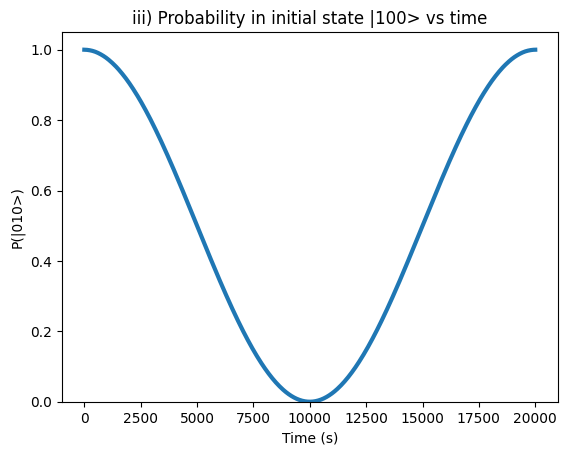

In [6]:
psi0 = tensor(basis(2,1), basis(2,0), basis(N,0))
times = np.linspace(0,20000,500)

prob100 = []
for t in times:
    state = time_ev_op2(t)*psi0
    prob100.append(np.abs(state[2*N,0])**2)

plt.plot(times, prob100, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|010>)")
plt.title("iii) Probability in initial state |100> vs time")
plt.show()

### iv)

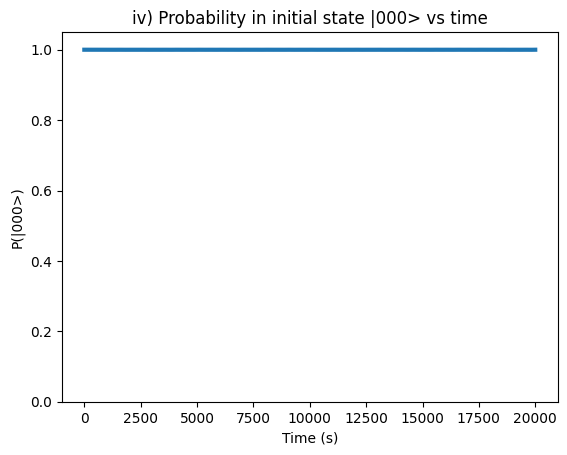

In [27]:
psi0 = tensor(basis(2,0), basis(2,0), basis(N,0))
times = np.linspace(0,20000,500)

prob000 = []
for t in times:
    state = time_ev_op2(t)*psi0
    prob000.append(np.abs(state[0,0])**2)

plt.plot(times, prob000, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|000>)")
plt.title("iv) Probability in initial state |000> vs time")
plt.show()

### v)

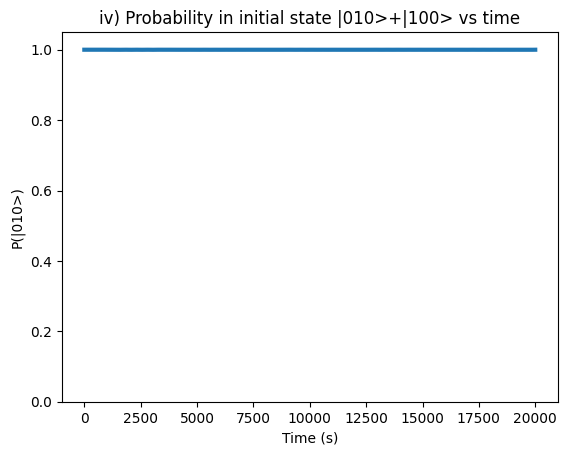

In [17]:
psi0 = 1/np.sqrt(2)*(tensor(basis(2,0), basis(2,1), basis(N,0)) + tensor(basis(2,1), basis(2,0), basis(N,0)))
times = np.linspace(0,20000,500)
probval = []
for t in times:
    state = time_ev_op2(t)*psi0
    probval.append((np.abs(state[N,0])**2 + np.abs(state[2*N,0])**2))

plt.plot(times, probval, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|010>)")
plt.title("iv) Probability in initial state |010>+|100> vs time")
plt.show()

### vi)

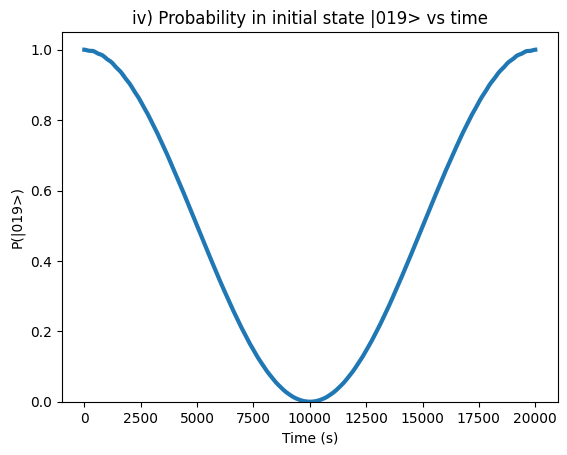

In [19]:
psi0 = tensor(basis(2,0), basis(2,1), basis(N,9))
times = np.linspace(0,20000,500)
probval = []
for t in times:
    state = time_ev_op2(t)*psi0
    probval.append(np.abs(state[N+9,0])**2)

plt.plot(times, probval, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|019>)")
plt.title("iv) Probability in initial state |019> vs time")
plt.show()

### vii)

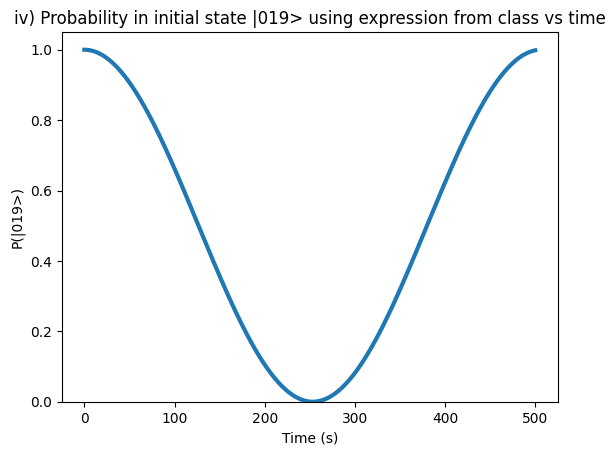

In [37]:
H_class = ((g**2)/4*(w-w0))*(sp1*sm2 + sm1*sp2) #analytic expression we derived from class

psi0 = tensor(basis(2,0), basis(2,1), basis(N,9))
times = np.linspace(0,500,500)
probval = []
for t in times:
    state = time_ev_op(H_class, t)*psi0
    probval.append(np.abs(state[N+9,0])**2)

plt.plot(times, probval, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|019>)")
plt.title("iv) Probability in initial state |019> using expression from class vs time")
plt.show()

The expression we derived in class for H_eff from the interaction picture and RWA. evolves the operator between |01> and |10> at a much quicker rate than the expression given in the hoemwork problem. The function takes a near identical form but has a period of oscillation of t=500s as opposed to t=20000s. 